Лабораторная работа №1

Доренская Елизавета Артёмовна

НПИмд-01-24

1132249572

In [8]:
import json
# Описание: Импортирует модуль json, который позволяет работать с данными в формате JSON (JavaScript Object Notation).
# JSON широко используется для обмена данными между клиентом и сервером, а также для хранения структуры данных.
# Зачем: Этот модуль может понадобиться для загрузки или сохранения данных в формате JSON,
# особенно если данные используются в дальнейшем анализе или обучении моделей.

import numpy as np
# Описание: Импортирует библиотеку NumPy, которая предоставляет поддержку работы с многомерными массивами и матрицами,
#а также набор математических функций для операций над ними.
# Зачем: NumPy часто используется для численных вычислений и обработки данных,
# что важно при предварительной обработке данных для машинного обучения.

import tensorflow as tf
# Описание: Импортирует библиотеку TensorFlow, популярный инструмент для разработки и обучения моделей машинного и глубокого обучения.
# Зачем: TensorFlow предоставляет инструменты для создания нейронных сетей, работы с данными и тренировки моделей.

import matplotlib.pyplot as plt
# Описание: Импортирует модуль pyplot из библиотеки Matplotlib, который используется для визуализации данных.
# Зачем: Визуализация важна для анализа результатов моделей, понимания их поведения и демонстрации результатов.

from sklearn.preprocessing import LabelEncoder
# Описание: Импортирует LabelEncoder из библиотеки Scikit-learn, который используется для преобразования категориальных данных в числовые значения.
# Зачем: Этот процесс необходим, когда алгоритмы машинного обучения требуют входные данные в числовом формате,
#а исходные данные представлены категориями (например, строки или классы).

from tensorflow.keras.preprocessing.text import Tokenizer
# Описание: Импортирует класс Tokenizer из модуль keras.preprocessing.text библиотеки TensorFlow.
# Зачем: Tokenizer используется для преобразования текстовых данных в числовые последовательности.
# Это необходимо для обработки текстов в задачах, связанных с обработкой естественного языка (NLP).

from tensorflow.keras.preprocessing.sequence import pad_sequences
# Описание: Импортирует функцию pad_sequences из модуля keras.preprocessing.sequence библиотеки TensorFlow.
# Зачем: Эта функция используется для заполнения (паддинга) последовательностей чисел до одинаковой длины.
# Это важно, поскольку модели нейронных сетей ожидают фиксированный размер входных данных.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import json

# Путь к вашим файлам на Google Диске
train_scenes_path = '/content/drive/My Drive/CLEVR/scenes/CLEVR_train_scenes.json'
train_questions_path = '/content/drive/My Drive/CLEVR/questions/CLEVR_train_questions.json'
val_scenes_path = '/content/drive/My Drive/CLEVR/scenes/CLEVR_val_scenes.json'
val_questions_path = '/content/drive/My Drive/CLEVR/questions/CLEVR_val_questions.json'

# Загрузка JSON-файлов
with open(train_scenes_path, 'r') as f:
    train_scenes = json.load(f)

with open(train_questions_path, 'r') as f:
    train_questions = json.load(f)

with open(val_scenes_path, 'r') as f:
    val_scenes = json.load(f)

with open(val_questions_path, 'r') as f:
    val_questions = json.load(f)



In [6]:
### 1. Объединение вопросов из обучающего и валидационного наборов данных
#Что происходит:
#Здесь создается список all_questions, который содержит все вопросы из обучающего (train_questions) и валидационного (val_questions) наборов данных.

#Как это работает:
#Используя списковое включение (list comprehension), код проходит по всем вопросам в обоих наборах данных и извлекает текст вопроса (q['question']).
all_questions = [q['question'] for q in train_questions['questions'] + val_questions['questions']]
print("Combined questions for tokenization")

### 2. Инициализация токенизатора
#Что происходит:
#Создается экземпляр Tokenizer из библиотеки Keras.
#Токенизатор будет использоваться для преобразования текста вопросов в последовательности целых чисел, где каждое слово будет сопоставлено
#с уникальным целым числом

#Параметры:
#oov_token='<OOV>': Этот параметр задает токен, который будет использоваться для "неизвестных" (out-of-vocabulary, OOV) слов,
#т.е. слов, которых нет в словаре токенизатора.
question_tokenizer = Tokenizer(oov_token='<OOV>')

### 3. Обучение токенизатора на текстах вопросов
#Что происходит:
#Метод fit_on_texts обучает токенизатор на текстах из списка all_questions.
#Это позволит нам позже преобразовать вопросы в последовательности целых чисел, готовых к подаче в нейронную сеть

#Что делает:
#Он создает словарь, где каждому уникальному слову присваивается уникальный индекс (номер). Слова, встречающиеся чаще, будут получать более низкие индексы.
question_tokenizer.fit_on_texts(all_questions)
print("Tokenizer initialized")

### 4. Преобразование обучающих вопросов в последовательности чисел
#Что происходит:
#Вопросы из обучающего набора преобразуются в последовательности чисел с помощью метода texts_to_sequences.
#Это позволяет нейронной сети обрабатывать текстовые данные в числовом формате
#Результат:
#X_train_questions_seq будет представлять собой список списков, где каждый внутренний список соответствует последовательности токенов для одного текста вопроса.
X_train_questions_seq = question_tokenizer.texts_to_sequences([q['question'] for q in train_questions['questions']])

### 5. Преобразование валидационных вопросов в последовательности чисел
#Что происходит:
#Bалидационные вопросы преобразуются в последовательности чисел. Это предусмотрено для оценки производительности модели на отдельных валидационных данных.
#Результат:
#X_val_questions_seq будет содержать такие же последовательности токенов для вопросов из валидационного набора.
X_val_questions_seq = question_tokenizer.texts_to_sequences([q['question'] for q in val_questions['questions']])
print("Train & Val seq converted")

### 6. Определение максимальной длины вопроса
#Что происходит:
#Код вычисляет максимальную длину среди всех последовательностей вопросов (как из обучающего, так и из валидационного наборов).
#Это значение будет использоваться для выравнивания (padding) последовательностей до одинаковой длины, чтобы обеспечить совместимый ввод для модели.
#Как это делает:
#Используя генераторное выражение, он проходит по спискам и находит длину каждой последовательности, затем берёт максимальное значение.
max_question_length = max(len(seq) for seq in X_train_questions_seq + X_val_questions_seq)

### 7. Выравнивание обучающих вопросов
#Что происходит:
#Метод pad_sequences используется для выравнивания последовательностей X_train_questions_seq до заданной максимальной длины max_question_length.
#Модели, такие как RNN или LSTM, требуют, чтобы все входные данные имели одинаковую длину
#Как работает:
#Если последовательность короче максимальной длины, она будет дополнена (паддирована) специальными значениями (по умолчанию нулем)
#в конце (параметр padding='post').
X_train_questions_padded = pad_sequences(X_train_questions_seq, maxlen=max_question_length, padding='post')

### 8. Выравнивание валидационных вопросов
#Что происходит:
#Здесь производится выравнивание последовательностей для валидационных вопросов, используя максимальную длину.
#Результат:
#X_val_questions_padded будет содержать паддированные последовательности для вопросов валидационного набора, готовые для подачи в модель.
X_val_questions_padded = pad_sequences(X_val_questions_seq, maxlen=max_question_length, padding='post')

Combined questions for tokenization
Tokenizer initialized
Train & Val seq converted


In [9]:
### Функция extract_features
# Эта функция извлекает атрибуты объектов, находящихся в сцене, и собирает их в один список.
# Параметр: scene — это словарь, представляющий одну сцену, содержащий список объектов.
def extract_features(scene):
    features = [] # Создаем пустой список для хранения извлеченных атрибутов.
    for obj in scene['objects']: # Перебираем все объекты в сцене.
        attributes = [obj['size'], obj['color'], obj['material'], obj['shape']]
        # Извлекаем атрибуты (размер, цвет, материал, форма) для каждого объекта и сохраняем их в списке attributes.
        features.extend(attributes) # Добавляем извлеченные атрибуты в общий список features
    return features # Возвращаем собранные атрибуты объектов как один плоский список

### Функция prep_dataset
# Эта функция подготавливает обучающий набор данных (входные и выходные данные) на основе сцен и вопросов.
def prep_dataset(scenes, questions):
    X = [] # Создаем пустые списки для хранения входных данных и ответов.
    y = [] # Создаем пустые списки для хранения входных данных и ответов.
    s_dict = {scene['image_index']: scene for scene in scenes['scenes']}
    # Создаем словарь (s_dict) для быстрого доступа к сценам по их image_index.
    # Это позволит быстро находить сцену, соответствующую вопросу, без необходимости перебора всех сцен.
    for question in questions['questions']: # Перебираем все вопросы
        image_index = question['image_index'] # Получаем индекс изображения, которому соответствует вопрос
        if image_index in s_dict: # Проверяем, существует ли сцена с таким image_index в нашем словаре.
            scene = s_dict[image_index] # Находим соответствующую сцену
            features = extract_features(scene) # Извлекаем атрибуты объектов сцены с помощью функции extract_features
            X.append(features) # Добавляем извлеченные файлы в список X (входные данные).
            y.append(question['answer']) # Добавляем правильный ответ на вопрос в список y (выходные данные).
    return X, y #Возвращаем совместимые наборы данных X и y

### Извлечение данных для обучения и валидации
# - print("Train & Val data extracted"): Выводит сообщение о завершении извлечения данных.
X_train_scenes_raw, y_train_raw = prep_dataset(train_scenes, train_questions)
# Мы вызываем функцию prep_dataset для извлечения данных из тренировочного и валидационного наборов.
X_val_scenes_raw, y_val_raw = prep_dataset(val_scenes, val_questions)
# Результаты сохраняются в переменных X_train_scenes_raw, y_train_raw для обучения и X_val_scenes_raw, y_val_raw для валидации.
print("Train & Val data extracted") # Выводит сообщение о завершении извлечения данных.

### Код для кодирования и дополнения последовательностей
# Создает один список, в который объединяются все атрибуты из обоих наборов данных X_train_scenes_raw и X_val_scenes_raw.
# Этот список будет использоваться для кодирования.

all_features = [item for sublist in X_train_scenes_raw + X_val_scenes_raw for item in sublist]
# Создает один список, в который объединяются все атрибуты из обоих наборов данных
scene_encoder = LabelEncoder() # Создаем экземпляр LabelEncoder из библиотеки sklearn,
#который будет использоваться для кодирования категориальных данных в числовые индексы.
scene_encoder.fit(all_features) # Обучаем кодировщик на всех извлеченных атрибутах
# (т.е. создаем словарь, где каждому уникальному атрибуту присваивается числовой индекс).

### Кодирование и дополнение последовательностей
X_train_scenes_encoded = [scene_encoder.transform(features) for features in X_train_scenes_raw]
# Применяем кодер к каждым из features в тренировочных данных, преобразовывая их в числовые индексы.
X_val_scenes_encoded = [scene_encoder.transform(features) for features in X_val_scenes_raw]
# То же самое для валидационных данных

### Дополнение последовательностей
max_scene_length = max(len(seq) for seq in X_train_scenes_encoded + X_val_scenes_encoded)
# Находим максимальную длину среди закодированных последовательностей, чтобы знать,
# до какого размера нужно дополнять (или обрезать) остальные последовательности
X_train_scenes_padded = pad_sequences(X_train_scenes_encoded, maxlen=max_scene_length, padding='post')
X_val_scenes_padded = pad_sequences(X_val_scenes_encoded, maxlen=max_scene_length, padding='post')
# Используя функцию pad_sequences из Keras, дополняем последовательности до одинаковой длины (max_scene_length)
# padding='post' значит, что нули будут добавляться в конец последовательностей, если они короче заданной длины
# Результат этих операций сохраняется в X_train_scenes_padded и X_val_scenes_padded,
# что позволяет входным данным иметь одинаковую длину для подачи в модель.

Train & Val data extracted


In [15]:
### Код для кодирования ответов
# Цель:
# Создать единый список всех ответов из тренировочного и валидационного наборов.

# y_train_raw: Это изначальный список ответов для тренировочного набора, полученный из функции prep_dataset.
# y_val_raw: Это изначальный список ответов для валидационного набора.
# all_answers: Здесь мы объединяем два списка (y_train_raw и y_val_raw) в один, чтобы кодировать все уникальные ответы в одном процессе.
# Это необходимо для того, чтобы убедиться, что все ответные метки из тренировочного и валидационного наборов будут известны кодировщику.
all_answers = y_train_raw + y_val_raw

### Создание экземпляра LabelEncoder
# Цель:
# Создать экземпляр класса LabelEncoder из библиотеки sklearn, который будет использоваться для преобразования меток в числовые значения.
# LabelEncoder: Этот класс используется для кодирования категориальных переменных, где каждое уникальное значение (в данном случае ответ) будет преобразовано в уникальный целочисленный индекс.
label_encoder = LabelEncoder()

### "Обучение" кодировщика
# Цель:
# "Обучить" кодировщик на данных о всех ответах.
# fit(): Метод fit() берет уникальные значения из all_answers и создает соответствие между уникальными ответами и их числовыми индексами.
# Например, если у вас есть ответы ["yes", "no", "maybe"], они будут кодированы как [0, 1, 2] соответственно.
# Этот шаг необходим, чтобы LabelEncoder знал, какие метки встречаются в данных и как их кодировать.
label_encoder.fit(all_answers)

### Кодирование ответов для тренировочного набора
# Цель:
# Преобразовать оригинальные ответы тренировочного набора в числовые индексы.
# transform(): Метод transform() принимает список оригинальных меток (y_train_raw)
# и возвращает новый массив, где каждый ответ заменен соответствующим числовым значением, найденным на этапе fit().
# Таким образом, вместо текста вы получите массив чисел, которые могут быть использованы в машинном обучении.
y_train_encoded = label_encoder.transform(y_train_raw)

### Кодирование ответов для валидационного набора
# Цель: То же, что и на предыдущем шаге, но для валидационного набора.
# ransform(): Аналогично, превращает оригинальные ответы y_val_raw в числовые индексы.
# Здесь важно, что метод использует то же соответствие, которое было создано на этапе fit(),
# чтобы обеспечить согласованность между тренировочными и валидационными данными.
y_val_encoded = label_encoder.transform(y_val_raw)
print(y_val_encoded)

[20 27 19 ... 27 25  0]


### Model

In [12]:
### 1. Определение входного слоя
q_input = tf.keras.layers.Input(shape=(max_question_length,), name='question_input')
# tf.keras.layers.Input: Это функция, которая создает входной слой для модели Keras. Он определяет форму входных данных.
# shape=(max_question_length,): Указывает, что входные данные – это последовательности фиксированной длины,
# где max_question_length – это максимальная длина вопроса (в символах или словах). Это помогает модели знать, какую форму имеют входные данные.
# name='question_input': Указывает имя для входного слоя, что может быть полезно при отладке и визуализации структуры модели.

### 2. Встраивание слов (Embedding Layer)
# Эмбеддинг (или векторное представление) — это способ представления дискретных объектов (таких как слова, символы или даже целые предложения)
# в виде непрерывных векторов в многомерном пространстве.
# Этот метод широко используется в задачах обработки естественного языка (NLP) и в других областях машинного обучения для преобразования категориальных данных
# в числовую форму, которую модели могут эффективно обрабатывать.
q_embedding = tf.keras.layers.Embedding(
    input_dim=len(question_tokenizer.word_index) + 1,  # +1 for OOV (out of voc)
    output_dim=128, # dims
    mask_zero=True # mask
)(q_input)
# tf.keras.layers.Embedding: Это слой встраивания, который преобразует целочисленные представления слов в плотные векторы фиксированной длины.
# Этот слой обучается в процессе тренировки модели.
# input_dim=len(question_tokenizer.word_index) + 1: Значение input_dim указывает на размер словаря. question_tokenizer.word_index содержит индексы всех слов,
# которые были токенизированы, и если максимальный индекс – это количество уникальных слов, то мы добавляем 1 для учета символа "разнообразия" (OOV) для слов,
# не включённых в словарь.
# output_dim=128: Это размер векторного пространства, в котором слова будут представлены.
# Чем выше это значение, тем более подробно модель может быть обучена, но также и большее количество параметров и риск переобучения.
# mask_zero=True: Эта функция сообщает модели игнорировать вектор, представляющий "ноль",
# что полезно для обработки последовательностей переменной длины.
#Обычно "ноль" используется для заполнения последовательностей, которые короче максимальной длины (padding).

### 3. Применение LSTM
question_lstm = tf.keras.layers.LSTM(64)(q_embedding)
# Создает и применяет слой LSTM (Long Short-Term Memory) к векторному представлению входящих данных, которые были получены после их эмбеддинга.
# экземпляр LSTM слоя с 64 единицами (или нейронами). Число 64 указывает на количество «скрытых» состояний в этом слое,
# что в свою очередь определяет размер выходного вектора, который будет передан на следующий слой сети.
# Это число можно выбрать в зависимости от сложности задачи и объема данных.

# ### Подробное описание

# 1. Что такое LSTM?
# LSTM — это тип рекуррентной нейронной сети (RNN), которая может запоминать информацию на длительные промежутки времени.
# Это делает LSTM особенно полезными для обработки последовательных данных, таких как текст или временные ряды. В отличие от обычных RNN,
# LSTM решает проблему исчезающего градиента, что позволяет ему эффективно запоминать и извлекать информацию из последовательностей.

# 3. Применение LSTM к входным данным:
#  (q_embedding) — это входные данные, которые мы передаем в LSTM слой. На этом этапе предполагается, что данные уже прошли через слой эмбеддинга (q_embedding),
#  что означает:
#   Каждое слово в предложении теперь представлено вектором фиксированной длины (в данном случае 128, как указано в output_dim слоя Embedding).
#   Эмбеддинг позволяет захватывать семантические отношения между словами, что важно для анализа текста.

# 4. Что в итоге?
#  Результатом применения LSTM к q_embedding будет выходной вектор, который summarizes (обобщает) информацию о входной последовательности.
# Этот вектор будет иметь размерность 64 (число нейронов в LSTM), и его можно использовать в следующих слоях для дальнейшей обработки
# (например, для классификации или извлечения признаков).

# ### Зачем это нужно?
# - Применение LSTM позволяет сети учитывать контекст и порядок слов в предложении.
# Это критически важно для понимания смысла текста, так как порядок слов часто влияет на значение.
# ЛСТМ может научиться не только на что-то реагировать в текущий момент (например, текущее слово), но и сохранять информацию о предыдущих словах,
# что улучшает качество обработки естественного языка.


In [13]:
# scene
s_input = tf.keras.layers.Input(shape=(max_scene_length,), name='scene_input')
s_embedding = tf.keras.layers.Embedding(
    input_dim=len(scene_encoder.classes_),
    output_dim=128,
    mask_zero=True
)(s_input)
scene_lstm = tf.keras.layers.LSTM(64)(s_embedding)

# все тоже самое, что и в предыдущем, но только работа со сценами

In [16]:
### 1. Объединение LSTM выхода
# Когда объединяются выходы двух LSTM, результатом является один тензор, который содержит информацию как из вопроса, так и из сцены.
# Это позволяет модели учитывать контекст обоих компонентов при дальнейшем прогнозировании.
# combined: Здесь создается новый тензор, который представляет собой объединение (конкатенацию) выходов двух сетей LSTM — question_lstm
#  (выход из LSTM для вопроса) и scene_lstm (выход из LSTM для сцены).
#  tf.keras.layers.concatenate: Эта функция принимает список тензоров (в данном случае question_lstm и scene_lstm) и
# соединяет их вдоль указанной оси (по умолчанию вдоль второй оси, то есть по размерности признаков).
combined = tf.keras.layers.concatenate([question_lstm, scene_lstm])

### 2. Полносвязный слой (Dense layer)
# fc1: Здесь создается полносвязный слой, который будет обрабатывать объединенные данные от предыдущего шага.
# tf.keras.layers.Dense(64, activation='relu'): Этот полносвязный слой имеет 64 нейрона и использует активацию ReLU (Rectified Linear Unit).
# Dense: Полносвязный слой, в котором каждый нейрон получает входные данные от всех нейронов предыдущего слоя.
# 64: Количество нейронов в этом слое; это означает, что выходом будет вектор длины 64,
# который будет содержать сжатую и обработанную информацию из входного тензора.
# activation='relu': Активация ReLU помогает добавить нелинейность в модель, что важно для обучения более сложных зависимостей.
fc1 = tf.keras.layers.Dense(64, activation='relu')(combined)

### 3. Выходной слой
# output: Это выходной слой, который создает предсказания на основе данных, полученных из fc1.
# len(label_encoder.classes_): Здесь количество нейронов в слое равно количеству классов (или меток),
# которые модель должна предсказать. label_encoder.classes_ содержит все возможные метки (например, категории или классы) в задаче классификации.
# tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax'):
# В этом полносвязном слое будет столько нейронов, сколько классов (меток) в задаче классификации.
# Используется активация 'softmax', чтобы превратить выходы в вероятности, что делает этот слой подходящим для многоклассовой классификации.
# softmax: Это функция активации, которая преобразовывает необработанные логиты в вероятности, суммирующиеся до 1.
# Каждая выходная вероятность соответствует вероятности принадлежности к конкретному классу.
output = tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')(fc1)

### 4. Определение модели
# model: Создается объект модели Keras.
# tf.keras.models.Model: Это класс Model из Keras, который принимает два обязательных аргумента: inputs и outputs.
# inputs=[q_input, s_input]: Указывает, что модель будет принимать два входа: q_input (вход для вопроса) и s_input (вход для сцены).
# outputs=output: Указывает, что выходом модели будет output, который является вероятностным распределением по классам.
model = tf.keras.models.Model(inputs=[q_input, s_input], outputs=output)

In [17]:
# Результатом этой строки кода является подготовка модели Keras к обучению.
# Она знает, как оптимизировать свои параметры (веса),
# как оценивать качество предсказаний и какие метрики использовать для отслеживания успеха в повышении точности.
# После компиляции модели можно приступать к обучению на данных

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.compile: Это метод, который связывает архитектуру вашей модели с выбранным алгоритмом оптимизации,
# функцией потерь и метриками, которые будут использованы во время обучения. Компиляция модели — это обязательный шаг перед началом процесса обучения.

# optimizer='adam': Здесь указывается алгоритм оптимизации, который будет использоваться для обновления весов модели во время обучения.
# Adam: Это один из наиболее популярных и часто используемых оптимизаторов в глубоких нейронных сетях.
# Он сочетает в себе преимущества двух других методов: AdaGrad и RMSProp.
# Adam адаптирует скорость обучения для каждого параметра (веса) на основе оценок первого и второго момента градиента
# (среднее значение и среднее квадратичное значение), что делает его эффективным на больших данных и в таких задачах, как обучение глубоких нейронных сетей.
# Этот оптимизатор автоматически корректирует скорость обучения на основе прошлых градиентов, что помогает в более стабильной и быстрой сходимости.

# loss='sparse_categorical_crossentropy': Указывается функция потерь, используемая для оценки качества модели от предсказаний до истинных значений.
# sparse_categorical_crossentropy: Эта функция потерь предназначена для многоклассовой классификации, где ваши метки классов представлены как целые числа
# (например, 0, 1, 2 и т. д.), а не как one-hot закодированные векторы.
# Это полезно, когда у вас много классов, так как она экономит память и вычислительные ресурсы,
# избегая необходимости создавать дополнительные векторы для каждого класса.
# Она рассчитывает степень "дискриминации" между предсказаниями и реальными классами и использует эту информацию для обновления весов в процессе обучения.

# metrics=['accuracy']: Здесь указывается список метрик, которые нужно отслеживать для оценки производительности модели во время обучения и валидации.
# accuracy: Это метрика, измеряющая долю правильных предсказаний.
# В контексте многоклассовой классификации это вычисляется как количество правильно предсказанных классов, деленное на общее количество примеров.
# Эта метрика позволяет легко понять, насколько хорошо модель классифицирует входные данные.


In [18]:
# Метод model.summary() в Keras предоставляет сводную информацию о модели, которую вы создали.
# Это полезный инструмент для понимания структуры вашей нейронной сети, её архитектуры и параметров.

# Вывод структурной информации о модели: Когда вы вызываете model.summary(), Keras выводит текстовую сводку, которая включает в себя следующие элементы:
# Список слоев: Отображает каждый слой модели в том порядке, в котором они были добавлены.
# Для каждого слоя вы увидите его тип (например, Dense, LSTM, Dropout, Activation, и т. д.) и его название (если применимо).
# Выходные данные каждого слоя: Для каждого слоя показывается форма тензора, который он генерирует (например, (None, 64) для слоя с 64 нейронами).
# Здесь None часто используется для представления переменной размерности (например, размер батча).
# Количество параметров: Для каждого слоя указано количество обучаемых параметров (весов и смещений) и общее количество параметров в модели.
# Обратите внимание, что для некоторых типов слоев (например, Dropout) количество параметров будет равно нулю, так как в этих слоях нет обучаемых параметров.
# Общая информация о модели: После сводного списка слоев вы также увидите общая информация о модели, включая общее количество параметров,
# общее количество обучаемых и необучаемых параметров.

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ question_input            │ (None, 43)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ scene_input (InputLayer)  │ (None, 40)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 43, 128)        │         10,496 │ question_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 43)             │              0 │ question_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 40, 128)        │          1,920 │ scene_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_1 (NotEqual)    │ (None, 40)             │              0 │ scene_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 64)             │         49,408 │ embedding[0][0],       │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 64)             │         49,408 │ embedding_1[0][0],     │
│                           │                        │                │ not_equal_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 128)            │              0 │ lstm[0][0],            │
│ (Concatenate)             │                        │                │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 28)             │          1,820 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 121,308 (473.86 KB)

 Trainable params: 121,308 (473.86 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Строка кода запускает процесс обучения модели, используя подготовленные входные данные и метки,
# и в процессе обучения отслеживает производительность модели на валидационном наборе.
# Это важный этап в создании модели машинного обучения, позволяющий модель эффективно адаптироваться к обучающим данным и обобщать производительность на новых,
# незнакомых данных. В результате, объект history будет содержать информацию о метриках каждой эпохи,
# что может быть полезно для дальнейшего анализа и визуализации результатов обучения.

history = model.fit(
    {'question_input': X_train_questions_padded, 'scene_input': X_train_scenes_padded},
    y_train_encoded,
    epochs=10,
    batch_size=32,
    validation_data=(
        {'question_input': X_val_questions_padded, 'scene_input': X_val_scenes_padded},
        y_val_encoded
    )
)

### 1. history = model.fit(...)

# model.fit(...): Это метод, который запускает процесс обучения модели на предоставленных данных.
# Он обучает модель, основываясь на входных данных и соответствующих метках, и возвращает объект history,
# содержащий информацию об истории обучения (например, значения функции потерь и метрик после каждой эпохи).

### 2. {'question_input': X_train_questions_padded, 'scene_input': X_train_scenes_padded}

# входные данные: Этот параметр указывает, какие данные используются для обучения модели.
# 'question_input': Имя первого входа модели, соответствующее данным вопросов, подготовленным с помощью предобработки (например, дополнение до фиксированной длины).
# X_train_questions_padded: Это массив, содержащий подготовленные данные для обучения, которые представляют собой вопросы, возможно, в виде последовательностей индексов (например, токенов).
# 'scene_input': Имя второго входа модели, соответствующее данным сцен.
# X_train_scenes_padded: Это массив, содержащий подготовленные данные для обучения, представляющие собой сцены, также в виде последовательностей индексов.

### 3. y_train_encoded

#  y_train_encoded: Это метки классов для обучающих данных, закодированные в формате,
# подходящем для выбранной функции потерь (в данном случае — для sparse_categorical_crossentropy).
# Эти метки указывают, к какому классу принадлежит каждый пример в обучающем наборе данных.

### 4. epochs=10

# epochs=10: Это количество итераций (эпох) по всему набору обучающих данных, которые модель будет проходить.
# Каждый проход — это одна эпоха, в течение которой модель обновляет свои веса на основе всех обучающих примеров.
# 10 эпох — это экспериментальное значение, которое означает, что модель будет обучаться 10 полных раз на всех примерах из обучающей выборки.

### 5. batch_size=32

# batch_size=32: Это количество примеров, которые будут использоваться для обновления весов модели за один шаг.
# В данном случае модель будет обрабатывать 32 примера за раз и затем обновлять свои веса.
# Чем меньше размер батча, тем чаще обновляются веса, что может привести к более быстрым изменениям,
# но может быть менее стабильным. Размер 32 является довольно распространенным значением.

### 6. validation_data=...

# validation_data=...: Этот параметр позволяет указать данные для валидации, которые используются для оценки производительности модели в процессе обучения.
# {'question_input': X_val_questions_padded, 'scene_input': X_val_scenes_padded}: Входные данные для валидации такие же, как и для обучения, но представляют собой отдельный набор данных.
# Эти данные помогают предотвратить переобучение, так как модель будет упоминаться о своей производительности на незадействованных данных.
# y_val_encoded: Это метки классов для валидационного набора.

Epoch 1/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 1859s 85ms/step - accuracy: 0.4598 - loss: 1.0481 - val_accuracy: 0.5286 - val_loss: 0.8801
Epoch 2/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 1868s 85ms/step - accuracy: 0.5319 - loss: 0.8690 - val_accuracy: 0.5398 - val_loss: 0.8524
Epoch 3/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 1886s 86ms/step - accuracy: 0.5405 - loss: 0.8540 - val_accuracy: 0.5490 - val_loss: 0.8437
Epoch 4/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 1901s 87ms/step - accuracy: 0.5499 - loss: 0.8367 - val_accuracy: 0.5479 - val_loss: 0.8417
Epoch 5/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 2016s 90ms/step - accuracy: 0.5539 - loss: 0.8282 - val_accuracy: 0.5520 - val_loss: 0.8298
Epoch 6/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 1908s 87ms/step - accuracy: 0.5578 - loss: 0.8228 - val_accuracy: 0.5601 - val_loss: 0.8210
Epoch 7/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 2003s 90ms/step - accuracy: 0.5604 - loss: 0.8173 - val_accuracy: 0.5569 - val_loss: 0.8205
Epoch 8/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 1932

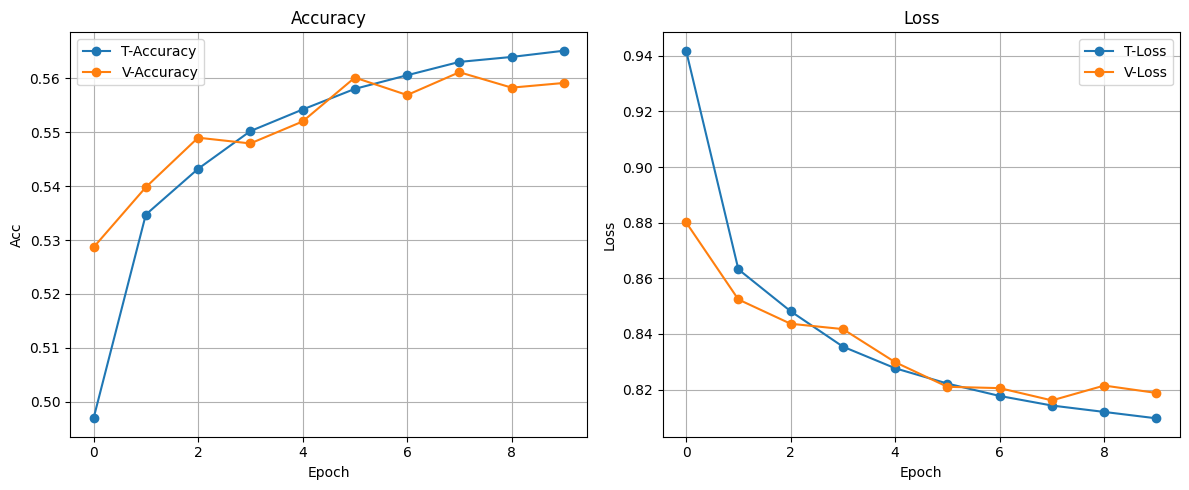

In [20]:
plt.figure(figsize=(12, 5))
# Создает новое окно графика или фигуры. Параметр figsize задает размеры фигуры в дюймах (ширина = 12 дюймов, высота = 5 дюймов).
# Это позволяет контролировать размеры графиков, чтобы они были четкими и удобными для восприятия.

plt.subplot(1, 2, 1)
# Настраивает подграфик в фигуре, который будет занимать место в комбинации из 1 строки и 2 столбцов, указывая на первый подграфик.
# Это создает структуру, в которой можно разместить несколько графиков в одной фигуре.

plt.plot(history.history['accuracy'], label='T-Accuracy', marker='o') # Строит график для точности обучения (accuracy) модели.
#  history.history['accuracy']: Доступ к списку значений точности, собранных в процессе обучения модели на обучающей выборке (train accuracy).
#  label='T-Accuracy': Название линии на графике для легенды, обозначает точность обучения.
#  marker='o': Используется для отображения маркеров в виде кружков для каждой точки данных на графике.

plt.plot(history.history['val_accuracy'], label='V-Accuracy', marker='o') # Строит график для точности валидации модели.
# history.history['val_accuracy']: Доступ к списку значений точности, собранных во время проверки валидационной выборки (validation accuracy).
# label='V-Accuracy': Название линии на графике для легенды, обозначает точность валидации.
#  marker='o': Используется для отображения маркеров в виде кружков для каждой точки данных на графике.

plt.title('Accuracy') # Устанавливает заголовок для первого подграфика, предлагая понять, что именно показывает этот график (точность).
plt.xlabel('Epoch') # Устанавливает метку по оси X, которая показывает количество эпох.
# Это значение указывает, сколько раз модель была обучена на всех примерах данных.
plt.ylabel('Acc') # Устанавливает метку по оси Y, показывающую значение точности (Accuracy).
plt.legend() # Добавляет легенду к графику, позволяя различать линии на графике по их меткам (T-Accuracy и V-Accuracy).
plt.grid(True) # Включает сетку на графике, что помогает лучше визуализировать данные и ориентироваться на графике.

plt.subplot(1, 2, 2) # Настраивает второй подграфик в той же фигуре, указывая на второй подграфик.
plt.plot(history.history['loss'], label='T-Loss', marker='o') # Строит график для значения функции потерь на обучении.
# history.history['loss']: Доступ к списку значений функции потерь, собранных в процессе обучения модели на обучающей выборке.
# label='T-Loss': Название линии на графике для легенды, обозначает значение функции потерь при обучении.
#  marker='o': Используется для отображения маркеров в виде кружков для каждой точки данных на графике.

plt.plot(history.history['val_loss'], label='V-Loss', marker='o') # Строит график для значения функции потерь на валидации.
# history.history['val_loss']: Доступ к списку значений функции потерь, собранных во время проверки валидационной выборки.
# label='V-Loss': Название линии на графике для легенды, обозначает значение функции потерь на валидации.
#  marker='o': Используется для отображения маркеров в виде кружков для каждой точки данных на графике.

plt.title('Loss') # Устанавливает заголовок для второго подграфика, показывая, что на этом графике будет представлено значение функции потерь.
plt.xlabel('Epoch') # Устанавливает метку по оси X для второго графика (также показывает количество эпох).
plt.ylabel('Loss') # Устанавливает метку по оси Y для второго графика, показывающую значение функции потерь.
plt.legend() # Добавляет легенду ко второму графику, позволяя различать линии по их меткам (T-Loss и V-Loss).
plt.grid(True) # Включает сетку на втором графике для лучшего восприятия данных.

plt.tight_layout() #Автоматически подстраивает параметры подграфиков и фигуры для улучшения компоновки.
# Это помогает избежать наложения графиков и делает визуализацию более чистой.
plt.show() # Отображает все построенные графики и влияет на то, что мы видим в окне. Как только эта команда выполнена, графики станут видимыми.

In [24]:
#1. Генерация случайных индексов
#Случайный выбор индексов позволяет протестировать модель на небольшом подмножестве данных.
#Это полезно для быстрой проверки работы модели и визуализации результатов без необходимости обрабатывать весь валидационный набор.
#Выбор случайных вопросов также помогает избежать предвзятости, связанной с последовательным выбором.
xindices = np.random.choice(len(X_val_questions_padded), 5, replace=False)
#np.random.choice: Эта функция используется для случайного выбора элементов из массива.
#В данном случае она выбирает 5 уникальных индексов из диапазона от 0 до длины массива X_val_questions_padded.
#len(X_val_questions_padded): Возвращает количество вопросов в валидационном наборе данных (паддированных вопросов).
#replace=False: Указывает, что выбор должен быть без замены, то есть один и тот же индекс не может быть выбран дважды.


#2. Извлечение тестовых данных
#Извлечение тестовых данных по выбранным индексам позволяет подготовить входные данные для предсказания.
#Вопросы, сцены и истинные метки должны соответствовать друг другу, чтобы можно было корректно оценить качество предсказаний модели.
#Это также помогает организовать данные в удобном формате для последующей обработки.
test_questions = X_val_questions_padded[indices]
test_scenes = X_val_scenes_padded[indices]
test_labels = y_val_encoded[indices]
# test_questions: Извлекает 5 вопросов из массива X_val_questions_padded по случайным индексам, сгенерированным на предыдущем шаге.
# test_scenes: Извлекает соответствующие сцены из массива X_val_scenes_padded, используя те же индексы.
# test_labels: Извлекает истинные метки (ответы) из массива y_val_encoded, используя те же индексы.

#3. Прогнозирование ответов модели
#Вызов метода predict на модели позволяет получить предсказания на основе входных данных (вопросов и сцен).
#Это ключевой этап, так как именно здесь модель применяет свои знания, полученные в процессе обучения, для генерации ответов на новые вопросы.
predict = model.predict({'question_input': test_questions, 'scene_input': test_scenes})
#model.predict(...): Вызывает метод предсказания модели, передавая ей тестовые вопросы и сцены в виде словаря.
#Модель возвращает вероятности для каждого класса (ответа) на основе входных данных.

#4. Получение предсказанных классов
#Функция np.argmax используется для извлечения индексов классов с максимальной вероятностью из массива предсказаний.
#Это необходимо для определения конкретного ответа, который модель считает наиболее вероятным для каждого вопроса.
#Без этого шага мы бы не смогли интерпретировать результаты модели.
predicted = np.argmax(predict, axis=1)
#np.argmax(predict, axis=1): Эта функция находит индекс максимального значения вдоль указанной оси (в данном случае по строкам).
#Это означает, что мы получаем предсказанный класс (ответ) для каждого вопроса, который соответствует максимальной вероятности

#5. Печать результатов
for i, idx in enumerate(indices):
    question_text = val_questions['questions'][idx]['question'] # original question
    true_answer = label_encoder.inverse_transform([test_labels[i]])[0]
    pred_answer = label_encoder.inverse_transform([predicted[i]])[0]
    print(f"--------------------------------------------------------------------------\nQuestion: {question_text}\nTrue Answer: {true_answer}\nPredicted Answer: {pred_answer}\n--------------------------------------------------------------------------\n")
#Цикл for i, idx in enumerate(indices): Проходит по всем индексам, которые были выбраны ранее.
#question_text = val_questions['questions'][idx]['question']: Извлекает оригинальный текст вопроса из валидационного набора данных по текущему индексу.
#true_answer = label_encoder.inverse_transform([test_labels[i]]): Преобразует истинную метку (числовой код) обратно в текстовый ответ с помощью label_encoder.
#pred_answer = label_encoder.inverse_transform([predicted[i]]): Аналогично преобразует предсказанный класс обратно в текстовый ответ.
#print(...): Форматирует и выводит информацию о каждом вопросе:
#Разделитель (--------------------------------------------------------------------------)
#Текст вопроса (Question: ...)
#Истинный ответ (True Answer: ...)
#Предсказанный ответ (Predicted Answer: ...)
#Разделитель для визуального отделения результатов.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
--------------------------------------------------------------------------
Question: There is a object that is to the right of the tiny thing in front of the small green matte ball; are there any gray cubes that are in front of it?
True Answer: yes
Predicted Answer: no
--------------------------------------------------------------------------

--------------------------------------------------------------------------
Question: There is a large gray thing that is the same shape as the small green matte object; what material is it?
True Answer: metal
Predicted Answer: rubber
--------------------------------------------------------------------------

--------------------------------------------------------------------------
Question: There is a big shiny thing that is behind the red metal thing; is it the same color as the small matte block?
True Answer: yes
Predicted Answer: yes
------------------------------------------------------------------------